This code is leveraged by Chatgpt and the prompt is given below 1.I only want trending news and nothing else which can help me analyse the trend by which news is the most trending recently or which one is the most recent like that 2.I have multiple json files which contains news can you make the same code for them files 3.The title I am getting is nan so I have to get a proper headline detail can you help me with that This code relies on frequency analysis and sorting to determine trending news.This is updated code of previous one as this code fetches the data from single master json file



In [27]:
import pandas as pd  # Import pandas for data manipulation
import matplotlib.pyplot as plt  # Import Matplotlib for visualization
import seaborn as sns  # Import Seaborn for enhanced visualizations
import json  # Import JSON module to read JSON files

# ========================= Load the JSON file =========================
json_file_path = "C:/Users/User/Desktop/second year/Big Data Capstone - Bhavik/news_database.master_news.json"


In [29]:
# Open the JSON file and read its contents
with open(json_file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)  # Load JSON data into a Python dictionary

# Convert the JSON data into a Pandas DataFrame
df = pd.DataFrame(data)



In [31]:
# ========================= Check Available Columns =========================
print("Available Columns:", df.columns)  # Print all column names in the dataset

# ========================= Find the Correct Date Column =========================
date_col = None  # Initialize date_col variable as None

# Iterate through all column names to find one related to 'date' or 'time'
for col in df.columns:
    if 'date' in col.lower() or 'time' in col.lower():  # Check if column name contains 'date' or 'time'
        date_col = col  # Assign column name to date_col
        break  # Exit the loop after finding the first match

# If a date column is found, process it
if date_col:
    print(f"Using '{date_col}' as the date column")  # Print the selected date column
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')  # Convert the column to datetime format
    df = df.dropna(subset=[date_col])  # Remove rows where the date is missing (NaN values)
else:
    print("⚠️ No date column found! Skipping time-based analysis.")  # Print warning if no date column is found


Available Columns: Index(['_id', 'headline', 'summary', 'link', 'timestamp', 'source',
       'sync_date', 'category'],
      dtype='object')
Using 'timestamp' as the date column


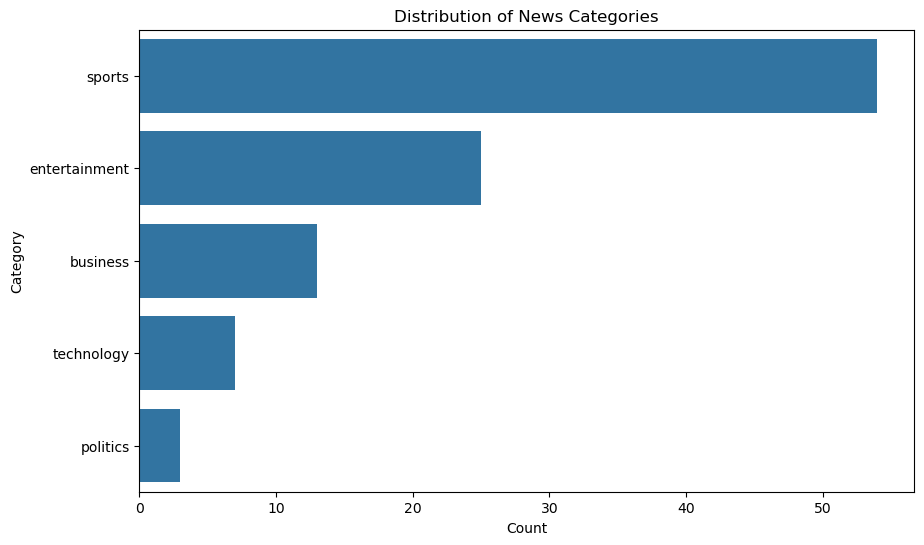

category
sports           54
entertainment    25
business         13
technology        7
politics          3
Name: count, dtype: int64


In [33]:
# ========================= Visualization: Distribution of News Categories =========================
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
sns.countplot(y=df['category'], order=df['category'].value_counts().index)  # Create a horizontal count plot of news categories
plt.title("Distribution of News Categories")  # Set title of the plot
plt.xlabel("Count")  # Set label for X-axis
plt.ylabel("Category")  # Set label for Y-axis
plt.show()  # Display the plot

print(df['category'].value_counts())


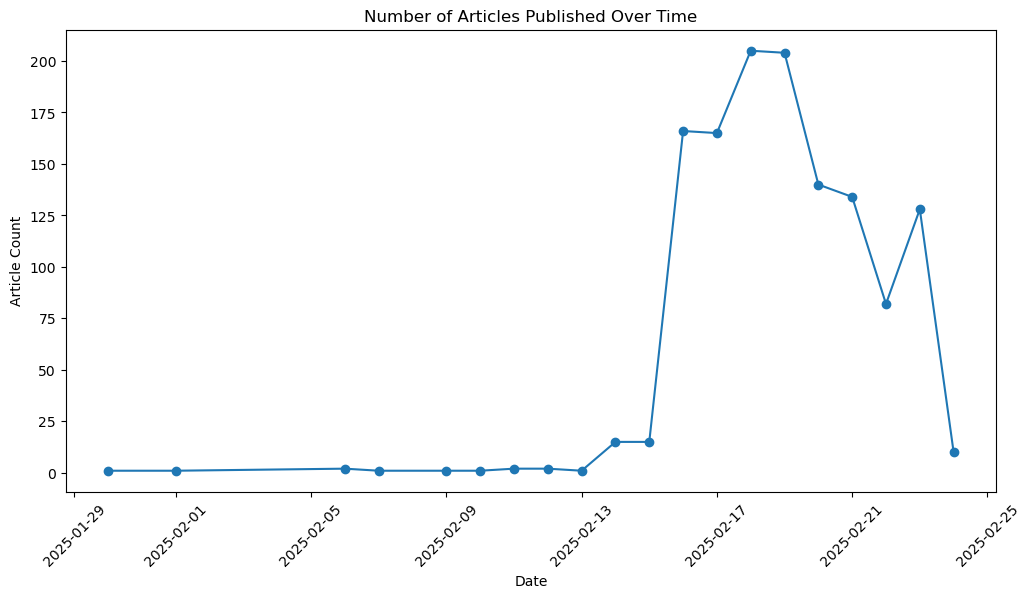

In [35]:
# ========================= Visualization: Articles Published Over Time =========================
if date_col:  # Proceed only if a valid date column was found
    df[date_col].dt.date.value_counts().sort_index().plot(
        kind='line', figsize=(12, 6), marker='o'  # Create a line plot for articles published over time
    )
    plt.title("Number of Articles Published Over Time")  # Set title of the plot
    plt.xlabel("Date")  # Set label for X-axis
    plt.ylabel("Article Count")  # Set label for Y-axis
    plt.xticks(rotation=45)  # Rotate X-axis labels for better readability
    plt.show()  # Display the plot
